# Rgb creation from multiple bands of an image

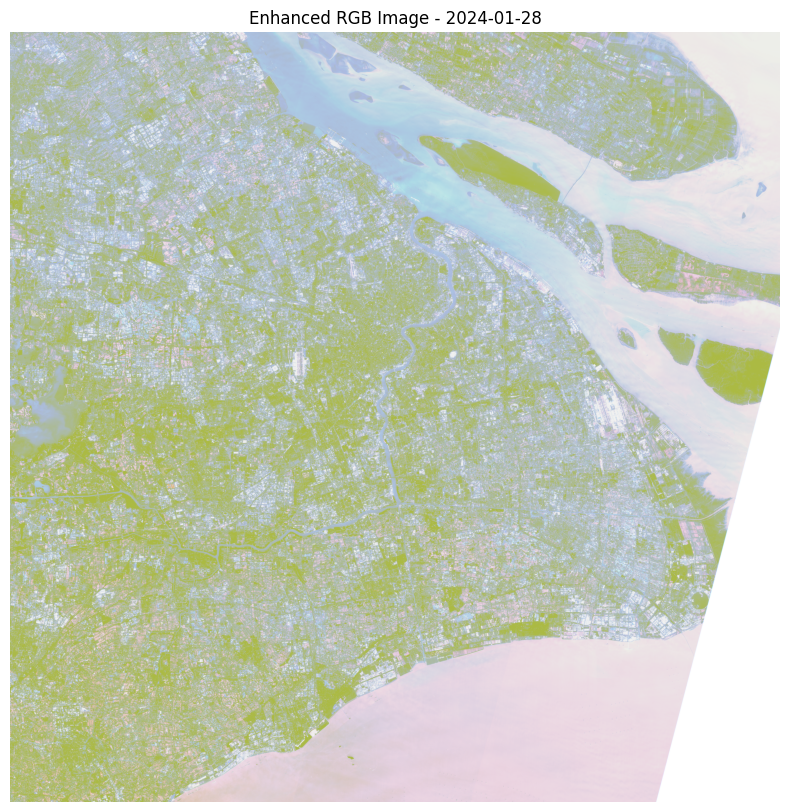

In [3]:
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure

# Function to read a band from a file
def read_band(file_path):
    with rasterio.open(file_path) as src:
        band = src.read(1).astype(np.float32)  # Ensure the band is in float32 format
        transform = src.transform
        crs = src.crs
    return band, transform, crs

# Function to normalize an array to 0-1 range
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

# Function to enhance contrast using histogram equalization
def enhance_contrast(rgb_image):
    red_eq = exposure.equalize_hist(rgb_image[:, :, 0])
    green_eq = exposure.equalize_hist(rgb_image[:, :, 1])
    blue_eq = exposure.equalize_hist(rgb_image[:, :, 2])
    return np.dstack((red_eq, green_eq, blue_eq))

# Function to save an RGB image to disk
def save_rgb_image(rgb_image, save_path, transform, crs):
    rgb_image = (rgb_image * 255).astype(np.uint8)
    with rasterio.open(save_path, 'w', driver='GTiff', 
                       width=rgb_image.shape[1], height=rgb_image.shape[0],
                       count=3, dtype=np.uint8,
                       crs=crs, transform=transform) as dst:
        dst.write(rgb_image.transpose(2, 0, 1))  # Transpose to (channels, height, width)

# Paths to your Sentinel bands (first image)
red_band_path1 =   r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_download\24\RT_L1C_T51RUQ_A036008_20240128T023952_2024-01-28\RT_L1C_T51RUQ_A036008_20240128T023952_B04.tif"
green_band_path1 = r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_download\24\RT_L1C_T51RUQ_A036008_20240128T023952_2024-01-28\RT_L1C_T51RUQ_A036008_20240128T023952_B03.tif"
blue_band_path1 =  r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\imgs_download\24\RT_L1C_T51RUQ_A036008_20240128T023952_2024-01-28\RT_L1C_T51RUQ_A036008_20240128T023952_B02.tif"

# Read the bands from the first image
red_band1, transform, crs = read_band(red_band_path1)
green_band1, _, _ = read_band(green_band_path1)
blue_band1, _, _ = read_band(blue_band_path1)

# Normalize bands to 0-1 range
red_band1_normalized = normalize(red_band1)
green_band1_normalized = normalize(green_band1)
blue_band1_normalized = normalize(blue_band1)

# Create RGB image
rgb_image1 = np.dstack((red_band1_normalized, green_band1_normalized, blue_band1_normalized))

# Enhance contrast of the RGB image
rgb_image1_enhanced = enhance_contrast(rgb_image1)

# Save the enhanced RGB image to disk
save_rgb_image(rgb_image1_enhanced, r"C:\Users\andre\OneDrive - Politecnico di Milano\Earth_observation\project\Mod_b\temp_out\rgb_20240128_enhanced.tif", transform, crs)

# Plot the enhanced image
plt.figure(figsize=(10, 10))
plt.imshow(rgb_image1_enhanced)
plt.title("Enhanced RGB Image - 2024-01-28")
plt.axis('off')
plt.show()

# Free up memory
del red_band1, green_band1, blue_band1, red_band1_normalized, green_band1_normalized, blue_band1_normalized, rgb_image1, rgb_image1_enhanced
